In [13]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from unidecode import unidecode
from wordcloud import WordCloud
import plotly.express as px
from geopy.geocoders import Nominatim
import folium
from textblob import TextBlob
from ipywidgets import interact

In [3]:
pd.set_option('display.max_colwidth', 100)
nltk.download('stopwords')
sns.set_theme(style="whitegrid")
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_csv('../data/enriched_jobs_cleaned.csv')
print(f"Nombre d'offres : {len(df)}")
print("\nStructure du dataset :")
display(df.head(3))

Nombre d'offres : 258

Structure du dataset :


,title,company,location,job_type,date_posted,sector,description,level
0,Docteur en pharmacie,Pharmacie Gambetta,"114 Avenue Lamine Gueye, Dakar, Sénégal (à côté Centre commercial Touba Sandaga)",CDD,2025-05-19,Santé et Pharmaceutique,santé / pharmacie,Mid
1,Commercial Terrain,Tabasite,"Dakar, Sénégal",CDD,2025-05-19,Technologie et Numérique,vente / commerce,Junior
2,Appel d’offres visant la sélection d’une compagnie d’assurance pour la prise en charge de la cou...,MAG International,"Dakar, Sénégal",Prestation de Services,2025-05-19,Finance et Assurance,administration / assurance,NaN


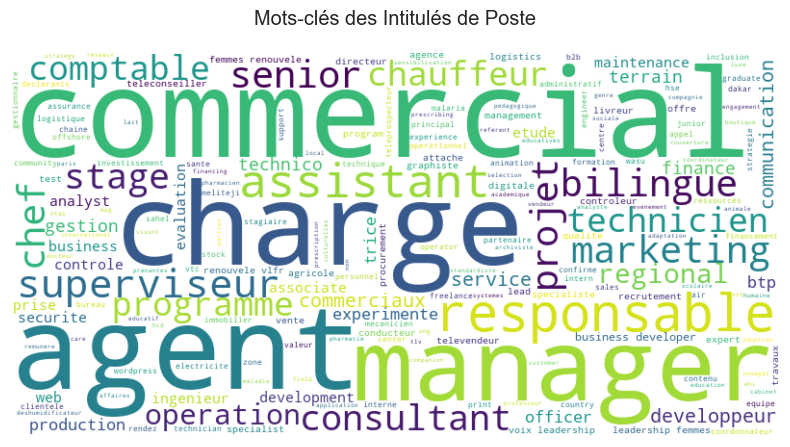

In [22]:
# Join all titles and lowercase
title_text = ' '.join(df['title']).lower()

# Removing accents
title_text = unidecode(title_text)

# Removing punctuation
title_text = re.sub(r'[^\w\s]', ' ', title_text)

# Removing extra spaces
title_text = re.sub(r'\s+', ' ', title_text)

# Get French stopwords
french_stopwords = set(stopwords.words('french')).union({
    'de', 'd', 'la', 'le', 'les', 'des', 'du', 'et', 'en', 'un', 'une', 'pour', 'avec'
})

# Remove stopwords and very short words (1-2 letters)
words = [w for w in title_text.split() if w not in french_stopwords and len(w) > 2]
title_text_filtered = ' '.join(words)

# Generate wordcloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(title_text_filtered)  

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots-clés des Intitulés de Poste', pad=20)
plt.show()

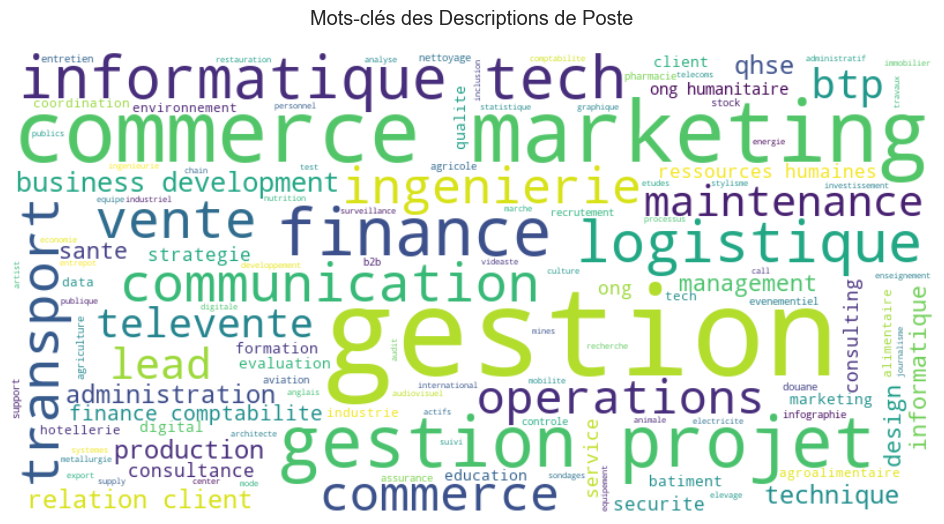

In [11]:
# Join all descriptions and lowercase
description_text = ' '.join(df['description'].dropna()).lower()  # dropna to avoid NaNs

# Remove accents
description_text = unidecode(description_text)

# Remove punctuation
description_text = re.sub(r'[^\w\s]', ' ', description_text)

# Remove extra spaces
description_text = re.sub(r'\s+', ' ', description_text)

# Remove stopwords and very short words (1-2 letters)
words_desc = [w for w in description_text.split() if w not in french_stopwords and len(w) > 2]
description_text_filtered = ' '.join(words_desc)

# Generate wordcloud
wordcloud_desc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(description_text_filtered)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_desc, interpolation='bilinear')
plt.axis('off')
plt.title('Mots-clés des Descriptions de Poste', pad=20)
plt.show()


In [21]:
# Count occurrences for each combination
combo_counts = df.groupby(['sector', 'level', 'job_type']).size().reset_index(name='count')

# 3D scatter plot
fig = px.scatter_3d(
    combo_counts,
    x='sector',
    y='level',
    z='job_type',
    size='count',
    color='sector',          
    hover_data=['count'],     
    height=600,
    width=800,
    title='3D Scatter: Secteur vs Niveau vs Type de contrat'
)

fig.update_layout(scene=dict(
                    xaxis_title='Sector',
                    yaxis_title='Job Level',
                    zaxis_title='Job Type'
                  ))

fig.show()

In [16]:
# Count occurrences for each combination
combo_counts = df.groupby(['sector', 'level', 'job_type']).size().reset_index(name='count')

# Sort by count descending
combo_counts_sorted = combo_counts.sort_values(by='count', ascending=False)

# Display top 20 combinations
print(combo_counts_sorted.head(20))


                                sector   level job_type  count
26                Finance et Assurance  Senior      CDD     18
35  ONG et Développement International  Senior      CDD     15
42  Recrutement et Ressources Humaines  Senior      CDD     14
36  Recrutement et Ressources Humaines  Junior      CDD     10
62            Technologie et Numérique     Mid      CDD     10
31  ONG et Développement International  Junior      CDD      9
34  ONG et Développement International     Mid      CDD      9
24                Finance et Assurance     Mid      CDD      9
58            Technologie et Numérique  Junior      CDD      9
49  Service Client et Centres d'Appels  Junior      CDD      7
40  Recrutement et Ressources Humaines     Mid      CDD      7
18                   Commerce et Vente     Mid      CDD      7
69             Transport et Logistique  Junior      CDD      7
61            Technologie et Numérique  Junior    Stage      6
14                   Commerce et Vente  Junior      CDD